In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1: Clustering
#### A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

#### 1.1 Read the data and do exploratory data analysis. Describe the data briefly.

In [2]:
bank_df = pd.read_csv('bank_marketing_part1_Data.csv') #read the dataset

In [3]:
bank_df.head() #1st five records of the dataset

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank_df.info() # information of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
bank_df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

Dataset has 7 variables with float datatype and there are no missing values in the dataset.

In [6]:
print('Dataset contains', bank_df.shape[0], 'records &', bank_df.shape[1], 'features')

Dataset contains 210 records & 7 features


In [7]:
bank_df.duplicated().sum()

0

There are no duplicate values present.

In [8]:
bank_df.describe() #description of the dataset

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


Mean & Median of the features are very close to each other so we can say the distribution may not be highly skewed

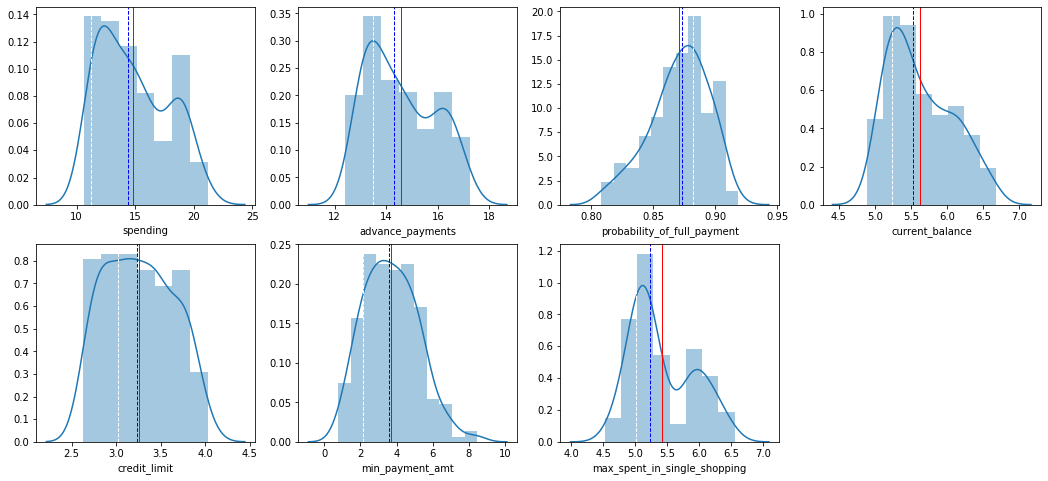

In [9]:
plt.figure(figsize = (18,8))
plt.subplot(2,4,1)
sns.distplot(bank_df['spending'])
plt.axvline(bank_df['spending'].mean(), color='red', linewidth=1)
plt.axvline(bank_df['spending'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(bank_df['spending'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(2,4,2)
sns.distplot(bank_df['advance_payments'])
plt.axvline(bank_df['advance_payments'].mean(), color='red', linewidth=1)
plt.axvline(bank_df['advance_payments'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(bank_df['advance_payments'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(2,4,3)
sns.distplot(bank_df['probability_of_full_payment'])
plt.axvline(bank_df['probability_of_full_payment'].mean(), color='red', linewidth=1)
plt.axvline(bank_df['probability_of_full_payment'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(bank_df['probability_of_full_payment'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(2,4,4)
sns.distplot(bank_df['current_balance'])
plt.axvline(bank_df['current_balance'].mean(), color='red', linewidth=1)
plt.axvline(bank_df['current_balance'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(bank_df['current_balance'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(2,4,5)
sns.distplot(bank_df['credit_limit'])
plt.axvline(bank_df['credit_limit'].mean(), color='red', linewidth=1)
plt.axvline(bank_df['credit_limit'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(bank_df['credit_limit'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(2,4,6)
sns.distplot(bank_df['min_payment_amt'])
plt.axvline(bank_df['min_payment_amt'].mean(), color='red', linewidth=1)
plt.axvline(bank_df['min_payment_amt'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(bank_df['min_payment_amt'].mode()[0], color='white', linestyle='dashed', linewidth=1);
plt.subplot(2,4,7)
sns.distplot(bank_df['max_spent_in_single_shopping'])
plt.axvline(bank_df['max_spent_in_single_shopping'].mean(), color='red', linewidth=1)
plt.axvline(bank_df['max_spent_in_single_shopping'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(bank_df['max_spent_in_single_shopping'].mode()[0], color='white', linestyle='dashed', linewidth=1);

* Variable **current_balance** looks like Right skewed and **probablity_of_full_payment** is left skewed.
* Variables **credit_limit** and **min_payment_amt** are little bit of right skewed however it looks like normally distributed.
* Variables **spending**, **advance_payments** and **max_spent_in_single_shopping** are Right skewed with multiple peaks.
* Since it is EDA, all these inferences are just visual interpretation by looking at the distribution plot but the skewness & normality can be computed in other ways.

In [1]:
sns.pairplot(bank_df);

NameError: name 'sns' is not defined

* Looking at the plot we can see spending-advance_payments, spending-current_balance, spending-credit_limit, advance_payments-current_balance shows linear relationship.
* All feature correlation with min_payment_amt variable are widely spreaded. And spending-probability_of_full_payment, advance_payments-probability_of_full_payment, probability_of_full_payment-max_spent_in_single_shopping & current_balance-probability_of_full_payment are widely spreaded.
* Correlation can be better visualized using heatmap.

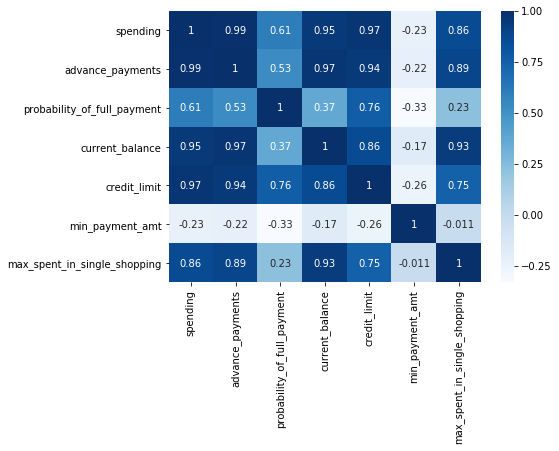

In [11]:
plt.figure(figsize=(7,5))
sns.heatmap(bank_df.corr(), annot = True, cmap = 'Blues');

* spending-advance_payments, spending-current_balance, spending-credit_limit, advance_payments-current_balance, advance_payments-credit_limit, current_balance-max_spent_in_single_shopping shows strong correlation.
* min_payment_amt shows negative correlations with other features.
* All others are moderately correlated.

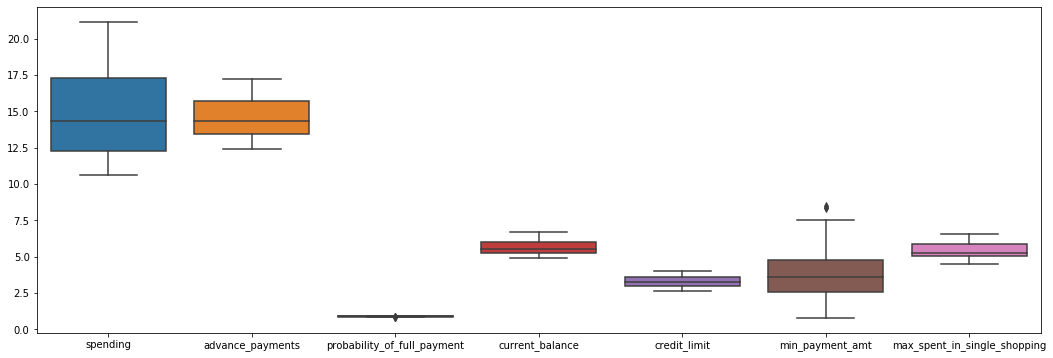

In [12]:
plt.figure(figsize = (18,6))
sns.boxplot(data = bank_df[['spending', 'advance_payments', 'probability_of_full_payment', 'current_balance', 'credit_limit', 
                            'min_payment_amt', 'max_spent_in_single_shopping']]);

Variables **probability_of_full_payment** & **min_payment_amt** have outliers which needs to be treated.

In [13]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [1]:
for feature in bank_df[['probability_of_full_payment', 'min_payment_amt']]: 
    lr,ur=treat_outlier(bank_df[feature])
    bank_df[feature]=np.where(bank_df[feature]>ur,ur,bank_df[feature])
    bank_df[feature]=np.where(bank_df[feature]<lr,lr,bank_df[feature])

NameError: name 'holiday_df' is not defined

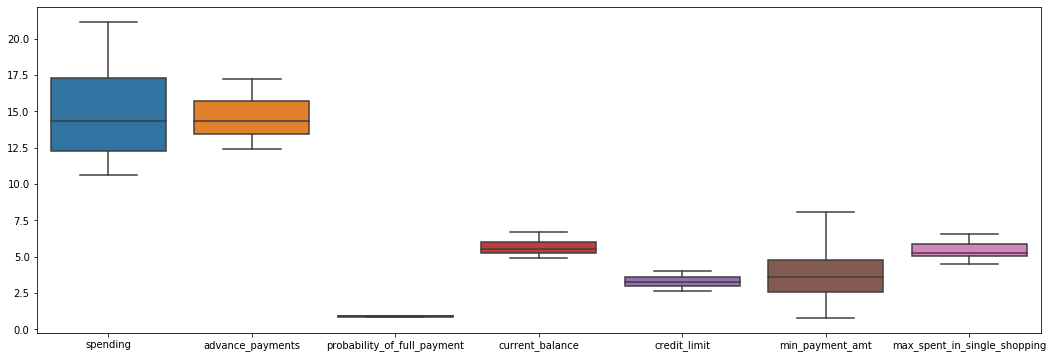

In [15]:
plt.figure(figsize = (18,6))
sns.boxplot(data = bank_df[['spending', 'advance_payments', 'probability_of_full_payment', 'current_balance', 'credit_limit', 
                            'min_payment_amt', 'max_spent_in_single_shopping']]);

#### 1.2  Do you think scaling is necessary for clustering in this case? Justify

* Yes, scaling is very much required while we perform clustering since the clustering is done based on distance either Euclidean, Manhattan, Chebyshev or some other distances.
* Clustering is done considering multiple features in the dataset based on the distances and if one variable is high in magnitude and another one is low in magnitude and if distance is calculated then the feature which is high in magnitude will dominate and the lower one's will not be given importance.
* Scaling is used to eliminate redundant data and ensures that good quality clusters are generated which can improve the efficiency of clustering algorithms. So it becomes an essential step before clustering as Euclidean distance or either others distances are very sensitive to the changes in the differences.

#### 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc = StandardScaler()
scaled_bank_df = sc.fit_transform(bank_df)

In [18]:
pd.DataFrame(scaled_bank_df)

,0,1,2,3,4,5,6
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.722220,-0.428801,-0.158181,0.193620,-1.366631
206,0.662292,0.814152,-0.307399,0.675253,0.476084,0.819993,0.789153
207,-0.281636,-0.306472,0.364831,-0.431064,-0.152873,-1.328049,-0.830235
208,0.438367,0.338271,1.232775,0.182048,0.600814,-0.957188,0.071238


In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [20]:
link = linkage(scaled_bank_df, method = 'ward', metric='euclidean')
#method ----- single, complete, average, weighted, centroid, median and ward

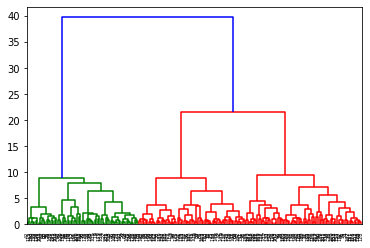

In [21]:
dend = dendrogram(link)

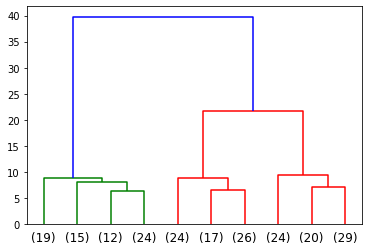

In [22]:
dend = dendrogram(link, truncate_mode = 'lastp', p = 10)

In [23]:
from scipy.cluster.hierarchy import fcluster

In [24]:
clusters = fcluster(link, 2, criterion = 'maxclust')
clusters

array([1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 2], dtype=int32)

In [25]:
bank_df['clusters'] = clusters

In [26]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [27]:
bank_df['clusters'].value_counts().sort_index()

1     70
2    140
Name: clusters, dtype: int64

In [28]:
aggdata=bank_df.groupby('clusters').mean()
aggdata['Freq']=bank_df.clusters.value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,13.085571,13.766214,0.864338,5.363714,3.045593,3.726353,5.103421,140


The Optimum number of cluster is 2.<br>
**Cluster 1:** Customers who spend more, do more transaction and also have more current balance than cluster 2.<br>
**Cluster 2:** Customers who spend less than customers in cluster 1 and with less current balance.<br>
Cluster 1 customers has more Probablity of doing full payment than Cluster 2.<br>
Cluster 1 customers max_spent_in_single_shopping is more. 

#### 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score.

In [29]:
bank_df = pd.read_csv('bank_marketing_part1_Data.csv') #read the dataset

In [30]:
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [31]:
sc = StandardScaler()
scaled_bank_df = sc.fit_transform(bank_df)

In [32]:
from sklearn.cluster import KMeans

In [33]:
wss = []

In [34]:
for i in range(1,11):
    KM = KMeans(n_clusters = i, random_state = 0)
    KM.fit(scaled_bank_df)
    wss.append(KM.inertia_)

In [35]:
wss

[1469.9999999999998,
 659.171754487041,
 430.6589731513006,
 371.65314399951626,
 326.76706714696627,
 289.31243152823356,
 264.2453379870382,
 241.1700420834431,
 223.8074386068585,
 204.78827779168486]

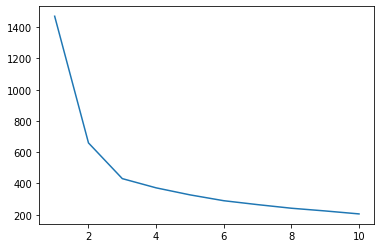

In [36]:
plt.plot(range(1,11), wss)

Looking at the elbow plot we could say either 2 clusters or 3 clusters would be the right choice. We can compute silhouette score to finalize the optimum clusters.

In [37]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [38]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_bank_df)
labels = k_means.labels_

In [39]:
silhouette_score(scaled_bank_df, labels)

0.4007270552751299

In [40]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_bank_df)
labels = k_means.labels_

In [41]:
silhouette_score(scaled_bank_df, labels)

0.46577247686580914

Silhouette score for 2 clusters is better than 3 clusters, so we select 2 clusters as optimum number of clusters.

In [42]:
bank_df['KMeans_clust'] = labels
bank_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,KMeans_clust
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,1
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,0


In [43]:
bank_df['KMeans_clust'] = np.where(bank_df['KMeans_clust'] == 1, 2, 1)

In [44]:
bank_df['KMeans_clust'].value_counts().sort_index()

1     77
2    133
Name: KMeans_clust, dtype: int64

In [45]:
aggdata1=bank_df.groupby('KMeans_clust').mean()
aggdata1['Freq']=bank_df.KMeans_clust.value_counts().sort_index()
aggdata1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
KMeans_clust,,,,,,,,
1,18.158571,16.054805,0.883817,6.127429,3.660519,3.480417,5.971740,77
2,12.930602,13.693459,0.863577,5.339699,3.025917,3.827444,5.081737,133


The Optimum number of cluster is 2.<br>
**Cluster 1:** Customers who spend more, do more transaction and also have more current balance than cluster 2.<br>
**Cluster 2:** Customers who spend less than customers in cluster 1 and with less current balance.<br>
Cluster 1 customers has more Probablity of doing full payment than Cluster 2.<br>
Cluster 1 customers max_spent_in_single_shopping is more.

#### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

**Cluster 1:** Customers who spend more using credit card. (Higher class people or who earns more than cluster 2 by looking at the credit limit)<br>
**Cluster 2:** Customers who spend less using credit card. (Looking at credit limit the bank has given, we assume these customers has low income compared to Cluster 1)<br>
* Customers in Cluster 2 spend less when compared to customers in Cluster 1, the bank can give more promotional offers for Cluster 2 customers to encourage more spending.
* The probablity of full payment is almost equal for both Clusters 1 & 2. So, bank can give more offers to Cluster 2 without hesitation.
* The credit limit for Cluster 2 customers can be increased to encourage spending.
* Cashback offers/Free shipping/instant discounts can be given to the customers in Cluster 2 to encourage max_spent_in_single_shopping.
* Additional offers can be given to Cluster 1 customers to encourage them to increase the min_payment_amt.
* Cluster 1 customers can be given with Dine out voucher discounts that can be used in top class restaurants and for Cluster 2 customers with medium class restaurants.
* Cashback on online purchases through top vendors website for Cluster 1 and medium vendors for Cluster 2.
* Cashback on Fuel pump usage. Cluster 1 with top brand like Shell, Reliance etc and Cluster 2 with Indian Oil, HP etc.
* Cashbacks on monthly bill payments, mobile recharges, monthly recurring transactions, no cost EMI etc.

### Problem 2: CART-RF-ANN

#### An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

#### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it.

In [46]:
insurance_df = pd.read_csv("insurance_part2_data.csv") #read the dataset

In [47]:
insurance_df.head() #1st five records of the dataset

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [48]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


Claimed is the dependent feature and others are independent.<br>
Out of the 10 columns, 6 are object type, while remaining 4 are int & float data type.<br>
Object - Agency_Code, Type, Claimed, Channel, Product Name, Destination.<br>
Int - Age, Duration.<br>
Float - Commision, Sales.<br>
It appears there are also no missing values.


In [49]:
print('Dataset contains', insurance_df.shape[0], 'records &', insurance_df.shape[1], 'features')

Dataset contains 3000 records & 10 features


In [50]:
insurance_df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

There are no null values present in the dataset.

In [51]:
insurance_df.describe() #description of the dataset

,Age,Commision,Duration,Sales
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,38.091000,14.529203,70.001333,60.249913
std,10.463518,25.481455,134.053313,70.733954
min,8.000000,0.000000,-1.000000,0.000000
25%,32.000000,0.000000,11.000000,20.000000
50%,36.000000,4.630000,26.500000,33.000000
75%,42.000000,17.235000,63.000000,69.000000
max,84.000000,210.210000,4580.000000,539.000000


* Mean & Median of Age are close to each other and could be little skewness present.
* For other features the mean & median are widely spread so the distribution must be skewed one.
* Also the min value of the Duration is -1 which maynot be right and we need to impute the value with other value.

In [52]:
for column in insurance_df[['Age', 'Agency_Code', 'Type', 'Claimed', 'Commision', 'Channel', 'Duration', 'Sales', 
                            'Product Name', 'Destination']]:
    print(column.upper(),': ',insurance_df[column].nunique())
    print(insurance_df[column].value_counts().sort_values())
    print('\n')

AGE :  70
8       1
14      1
83      1
77      1
84      1
     ... 
35     94
30     96
48    108
31    125
36    999
Name: Age, Length: 70, dtype: int64


AGENCY_CODE :  4
JZI     239
CWT     472
C2B     924
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1163
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2076
Name: Claimed, dtype: int64


COMMISION :  324
126.75       1
12.45        1
46.80        1
21.35        1
17.55        1
          ... 
7.70        57
23.76       61
54.00       61
63.21       62
0.00      1366
Name: Commision, Length: 324, dtype: int64


CHANNEL :  2
Offline      46
Online     2954
Name: Channel, dtype: int64


DURATION :  257
4580     1
149      1
141      1
215      1
217      1
        ..
11      81
10      81
6       81
5       82
8       83
Name: Duration, Length: 257, dtype: int64


SALES :  380
271.00      1
62.40       1
491.50      1
159.00      1
100.50      1
         ... 
216.00     59
2

Number of unique values in each features are below.<br>
AGE :  70<br>
AGENCY_CODE :  4<br>
TYPE :  2<br>
CLAIMED :  2<br>
COMMISION :  324<br>
CHANNEL :  2<br>
DURATION :  257<br>
SALES :  380<br>
PRODUCT NAME :  5<br>
DESTINATION :  3<br>

In [53]:
#dropping the Duration value which is negative
insurance_df['Duration'] = np.where(insurance_df['Duration'] <= 0, insurance_df['Duration'].median(), insurance_df['Duration'])

In [54]:
insurance_df.duplicated().sum() #checking duplicate values

139

There are 139 duplicate records in the dataset which is not necessary to be dropped since the dataset is based on the insurance claim and there are possibilities that a person can avail insurance with same age, same agency code, same insurance value, duration of trip etc.

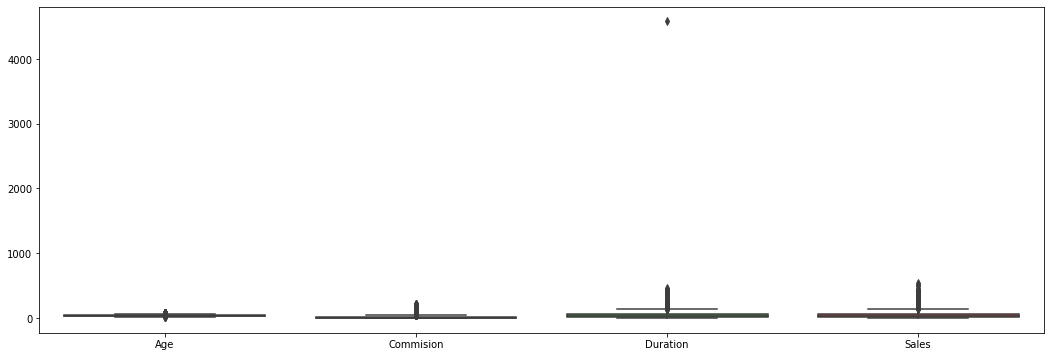

In [55]:
plt.figure(figsize = (18,6))
sns.boxplot(data = insurance_df[['Age', 'Commision', 'Duration', 'Sales']]);

Outliers present in all the features which needs to be treated. Though the CART and Random Forest are robust to outliers and Neural Networks can handle outliers if there are more hidden layers but we are treating the outliers for these models now.

In [56]:
def outlier_treatment(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [57]:
for feature in insurance_df[['Age', 'Commision', 'Duration', 'Sales']]: 
    lr,ur=outlier_treatment(insurance_df[feature])
    insurance_df[feature]=np.where(insurance_df[feature]>ur,ur,insurance_df[feature])
    insurance_df[feature]=np.where(insurance_df[feature]<lr,lr,insurance_df[feature])

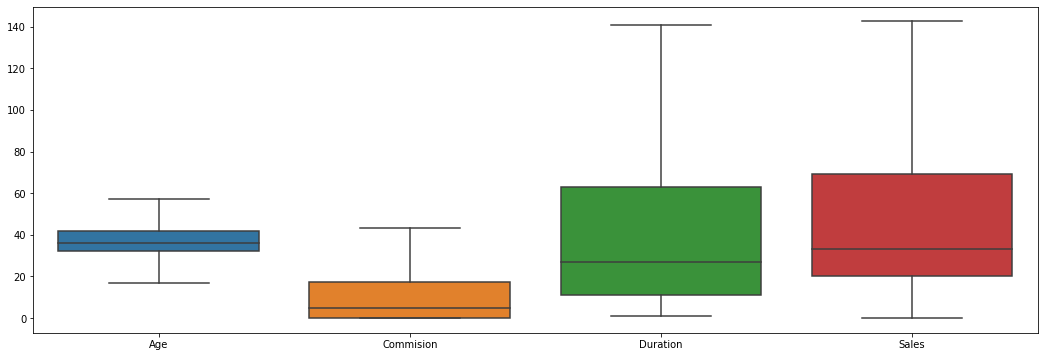

In [58]:
plt.figure(figsize = (18,6))
sns.boxplot(data = insurance_df[['Age', 'Commision', 'Duration', 'Sales']]);

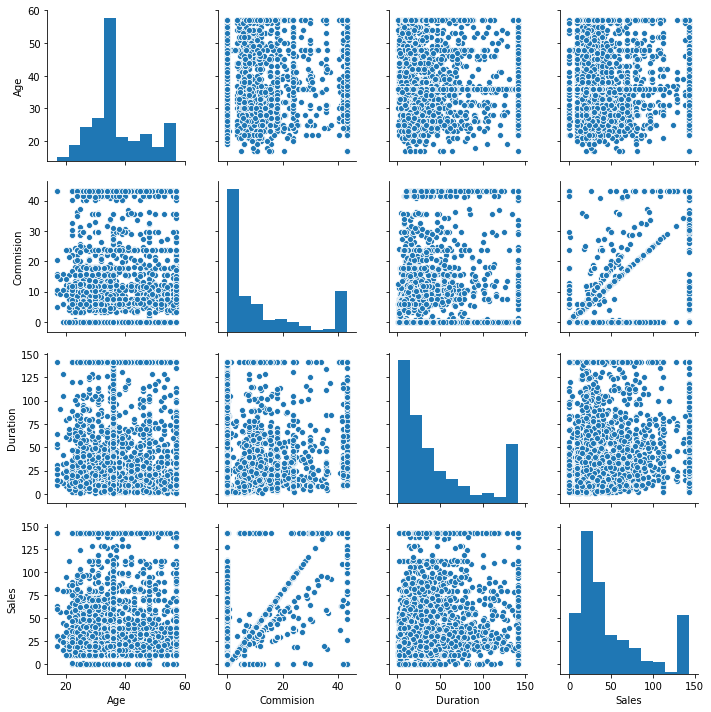

In [59]:
sns.pairplot(insurance_df);

There is no much linearity between the features in the dataset

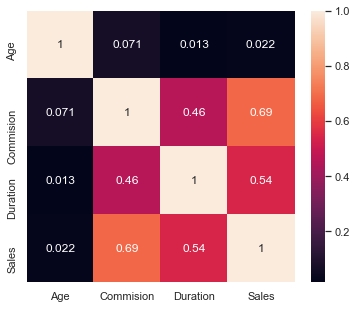

In [60]:
plt.figure(figsize=(6,5))
sns.set(font_scale=1)
sns.heatmap(insurance_df[['Age', 'Commision', 'Duration', 'Sales']].corr(), annot=True)

All the features are positively correlated.<br>
Sales-Commision, Sales-Duration & Duration-Commision are moderately correlated.

In [61]:
for feature in insurance_df.columns: 
    if insurance_df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(insurance_df[feature].unique()))
        print(pd.Categorical(insurance_df[feature].unique()).codes)
        insurance_df[feature] = pd.Categorical(insurance_df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


Object datatype is converted to int to proceed model building. Independent feature 0 means not claimed and 1 means claimed.

In [62]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null float64
Agency_Code     3000 non-null int8
Type            3000 non-null int8
Claimed         3000 non-null int8
Commision       3000 non-null float64
Channel         3000 non-null int8
Duration        3000 non-null float64
Sales           3000 non-null float64
Product Name    3000 non-null int8
Destination     3000 non-null int8
dtypes: float64(4), int8(6)
memory usage: 111.5 KB


In [63]:
insurance_df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0,0.00,1,34.0,20.00,2,0
2,39.0,1,1,0,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0,0.00,1,4.0,26.00,1,0
4,33.0,3,0,0,6.30,1,53.0,18.00,0,0


In [64]:
insurance_df['Claimed'].value_counts(normalize = True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

There is no issue of class imbalance here as we have reasonable proportions in both the classes

#### 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

#### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model

#### Extracting the target column into separate vectors for training set and test set

In [65]:
X = insurance_df.drop("Claimed", axis=1)
y = insurance_df.pop("Claimed")
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48.0,0,0,0.70,1,7.0,2.51,2,0
1,36.0,2,1,0.00,1,34.0,20.00,2,0
2,39.0,1,1,5.94,1,3.0,9.90,2,1
3,36.0,2,1,0.00,1,4.0,26.00,1,0
4,33.0,3,0,6.30,1,53.0,18.00,0,0


#### Splitting data into training and test set

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

In [67]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2100, 9)
X_test (900, 9)
train_labels (2100,)
test_labels (900,)


#### Building a Decision Tree Classifier

In [68]:
from sklearn.tree import DecisionTreeClassifier

In [69]:
from sklearn.model_selection import RandomizedSearchCV
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50,5)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10,14]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4,6,8]
# Create the random grid
dt_random_grid = {
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(dt_random_grid)

{'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 16, 27, 38, 50], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [70]:
dt=DecisionTreeClassifier(random_state = 0)
dt_randomcv=RandomizedSearchCV(estimator=dt,param_distributions=dt_random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=0,n_jobs=-1)
### fit the randomized model
dt_randomcv.fit(X_train,train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    4.6s finished


RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 16, 27, 38, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14]},
                   random_state=0, verbose=2)

In [71]:
dt_randomcv.best_params_

{'min_samples_split': 14,
 'min_samples_leaf': 6,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'gini'}

In [72]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini'],
    'max_depth': [3,5,7,10],
    'max_features': ['auto'],
    'min_samples_leaf': [5,6,8,10,15],
    'min_samples_split': [12,14,16,20],
}

dtcl = DecisionTreeClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid, cv = 5)

In [73]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 14}


DecisionTreeClassifier(max_depth=7, max_features='auto', min_samples_leaf=5,
                       min_samples_split=14, random_state=0)

In [74]:
from sklearn import tree

In [75]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

tree_regularized.close()
dot_data

#### Variable Importance

In [76]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Type          0.328659
Sales         0.280933
Agency_Code   0.144899
Product Name  0.111437
Duration      0.053970
Commision     0.047895
Age           0.029801
Destination   0.002406
Channel       0.000000


#### Predicting on Training and Test dataset

In [77]:
# Predict both the train and test data
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

#### Getting the Predicted Classes and Probs

In [78]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.000000,0.000000
1,0.381818,0.618182
2,0.972222,0.027778
3,0.272727,0.727273
4,0.833333,0.166667


#### Model Evaluation
#### AUC and ROC for the training data

In [79]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

AUC: 0.844


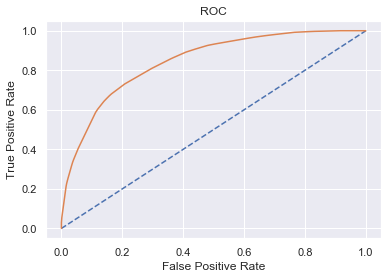

In [80]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

#### AUC and ROC for the test data

AUC: 0.827


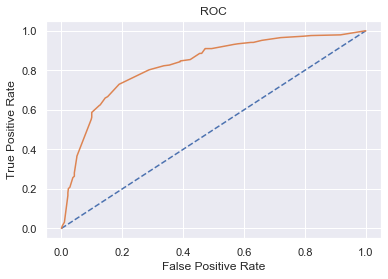

In [81]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC');

#### Confusion Matrix for the training data

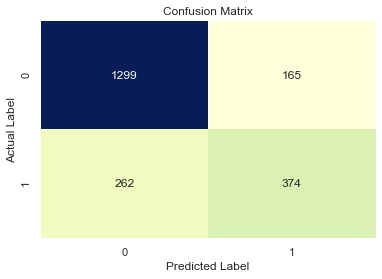

In [82]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [83]:
cart_train_acc = best_grid.score(X_train, train_labels)
cart_train_acc

0.7966666666666666

In [84]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1464
           1       0.69      0.59      0.64       636

    accuracy                           0.80      2100
   macro avg       0.76      0.74      0.75      2100
weighted avg       0.79      0.80      0.79      2100



In [85]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)            
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.69
cart_train_recall  0.59
cart_train_f1  0.64


#### Confusion Matrix for test data

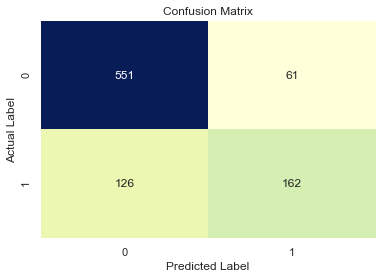

In [86]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [87]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7922222222222223

In [88]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       612
           1       0.73      0.56      0.63       288

    accuracy                           0.79       900
   macro avg       0.77      0.73      0.74       900
weighted avg       0.79      0.79      0.78       900



In [89]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)           
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.73
cart_train_recall  0.56
cart_train_f1  0.63


### CART Conclusion


<b>Train Data:</b>  
    AUC: 84.4%        
    Accuracy: 80%        
    Sensitivity: 59%     
    Precision: 69%        
    f1-Score: 64%       
            
<b>Test Data:</b>      
    AUC: 82.7%      
    Accuracy: 79%      
    Sensitivity: 56%    
    Precision: 73%       
    f1-Score: 63%     
  
Train & Test set results are almost similar and with the overall measures high, the model is a good model.

Type is the most important variable for predicting claim.

#### Building a Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50,5)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10,12, 14, 16]
# Minimum number of samples required at each leaf node
min_samples_leaf = [2, 4,6,8, 10, 12]
# Create the random grid
rf_random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(rf_random_grid)

{'n_estimators': [200, 236, 273, 310, 346, 383, 420, 457, 493, 530, 567, 604, 640, 677, 714, 751, 787, 824, 861, 897, 934, 971, 1008, 1044, 1081, 1118, 1155, 1191, 1228, 1265, 1302, 1338, 1375, 1412, 1448, 1485, 1522, 1559, 1595, 1632, 1669, 1706, 1742, 1779, 1816, 1853, 1889, 1926, 1963, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [5, 16, 27, 38, 50], 'min_samples_split': [5, 10, 12, 14, 16], 'min_samples_leaf': [2, 4, 6, 8, 10, 12], 'criterion': ['entropy', 'gini']}


In [92]:
rf=RandomForestClassifier(random_state = 0)
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=rf_random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=0,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.0min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [5, 16, 27, 38, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8, 10,
                                                             12],
                                        'min_samples_split': [5, 10, 12, 14,
                                                              16],
                                        'n_estimators': [200, 236, 273, 310,
                                                         346, 383, 420, 457,
                                                         493, 530, 567, 604,
                                                         640, 677, 714, 751,
 

In [93]:
rf_randomcv.best_params_

{'n_estimators': 310,
 'min_samples_split': 14,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 16,
 'criterion': 'gini'}

In [94]:
param_grid = {
    'max_depth': [16,20], #20,40,30,800
    'max_features': ['log2'], #log2, sqrt, auto,log2
    'min_samples_leaf': [4,6], #20,30, 25,6
    'min_samples_split': [14,16], #50,60, 40,14
    'n_estimators': [250,300,350] #1500, 2000,800
}

rfcl = RandomForestClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [95]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [16, 20], 'max_features': ['log2'],
                         'min_samples_leaf': [4, 6],
                         'min_samples_split': [14, 16],
                         'n_estimators': [250, 300, 350]})

In [96]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 6,
 'min_samples_split': 14,
 'n_estimators': 300}

In [97]:
best_grid = grid_search.best_estimator_

In [98]:
best_grid

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_leaf=6,
                       min_samples_split=14, n_estimators=300, random_state=0)

#### Predicting the Training and Testing data

In [99]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

#### RF Model Performance Evaluation on Training data

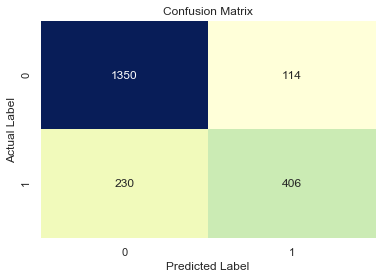

In [100]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [101]:
rf_train_acc=best_grid.score(X_train,train_labels) 
rf_train_acc

0.8361904761904762

In [102]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1464
           1       0.78      0.64      0.70       636

    accuracy                           0.84      2100
   macro avg       0.82      0.78      0.79      2100
weighted avg       0.83      0.84      0.83      2100



In [103]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)            
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.78
rf_train_recall  0.64
rf_train_f1  0.7


Area under Curve is 0.7802479637075987


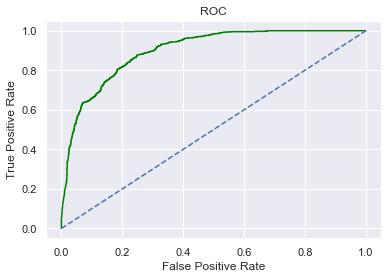

In [104]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

#### RF Model Performance Evaluation on Test data

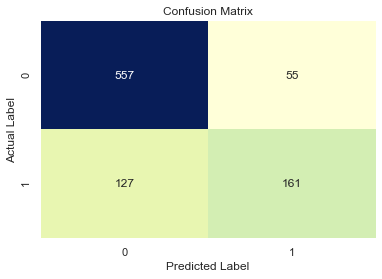

In [105]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [106]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7977777777777778

In [107]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       612
           1       0.75      0.56      0.64       288

    accuracy                           0.80       900
   macro avg       0.78      0.73      0.75       900
weighted avg       0.79      0.80      0.79       900



In [108]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)           
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.75
rf_test_recall  0.56
rf_test_f1  0.64


Area under Curve is 0.7345792483660131


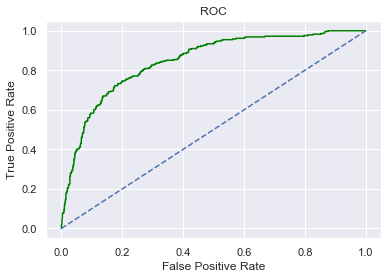

In [109]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', rf_test_auc)

In [110]:
# Variable Importance
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Sales         0.200842
Agency_Code   0.195794
Product Name  0.175977
Duration      0.136947
Commision     0.134527
Age           0.090442
Type          0.043322
Destination   0.018955
Channel       0.003193


#### Random Forest Conclusion

Compare the model performance and give the interpretations
  
<b>Train Data:</b>  
    AUC: 78%        
    Accuracy: 84%        
    Sensitivity: 64%     
    Precision: 78%        
    f1-Score: 70%       
            
<b>Test Data:</b>      
    AUC: 73%      
    Accuracy: 80%      
    Sensitivity: 56%    
    Precision: 75%       
    f1-Score: 64%     
  
Sales is the most important variable for predicting claim

#### Building a Neural Network Classifier

In [111]:
from sklearn.neural_network import MLPClassifier

In [112]:
from sklearn.preprocessing import StandardScaler

In [113]:
sc = StandardScaler()

In [114]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [115]:
from sklearn.model_selection import RandomizedSearchCV

hidden_layer_sizes = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
activation = ['logistic', 'relu']
max_iter = [200, 300, 500]
solver = ['adam','sgd']
tol = [0.001, 0.0001]

nncl_random_grid = {'hidden_layer_sizes': hidden_layer_sizes, 
               'activation': activation,
               'max_iter': max_iter,
               'solver': solver,
               'tol': tol, 
              }
print(nncl_random_grid)

{'hidden_layer_sizes': [200, 400, 600, 800, 1000], 'activation': ['logistic', 'relu'], 'max_iter': [200, 300, 500], 'solver': ['adam', 'sgd'], 'tol': [0.001, 0.0001]}


In [116]:
nncl=MLPClassifier(random_state = 0)
nncl_randomcv=RandomizedSearchCV(estimator=nncl,param_distributions=nncl_random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=0,n_jobs=-1)
### fit the randomized model
nncl_randomcv.fit(X_train,train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.5min finished


RandomizedSearchCV(cv=3, estimator=MLPClassifier(random_state=0), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'relu'],
                                        'hidden_layer_sizes': [200, 400, 600,
                                                               800, 1000],
                                        'max_iter': [200, 300, 500],
                                        'solver': ['adam', 'sgd'],
                                        'tol': [0.001, 0.0001]},
                   random_state=0, verbose=2)

In [117]:
nncl_randomcv.best_params_

{'tol': 0.0001,
 'solver': 'adam',
 'max_iter': 500,
 'hidden_layer_sizes': 800,
 'activation': 'logistic'}

In [118]:
param_grid = {
    'hidden_layer_sizes': [800], # 100,200 
    'activation': ['logistic'],
    'max_iter': [500], # 150,200
    'solver': ['adam'], #sgd
    'tol': [0.0001], 
}

nncl = MLPClassifier(random_state = 0)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 5)

In [119]:
grid_search.fit(X_train, train_labels)
grid_search.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': 800,
 'max_iter': 500,
 'solver': 'adam',
 'tol': 0.0001}

In [120]:
best_grid = grid_search.best_estimator_
best_grid

MLPClassifier(activation='logistic', hidden_layer_sizes=800, max_iter=500,
              random_state=0)

#### Predicting the Training and Testing data

In [121]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict = best_grid.predict(X_test)

#### RF Model Performance Evaluation on Training data

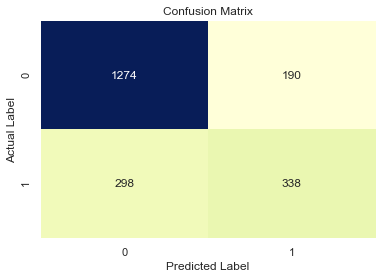

In [122]:
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [123]:
nn_train_acc=best_grid.score(X_train,train_labels) 
nn_train_acc

0.7676190476190476

In [124]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84      1464
           1       0.64      0.53      0.58       636

    accuracy                           0.77      2100
   macro avg       0.73      0.70      0.71      2100
weighted avg       0.76      0.77      0.76      2100



In [125]:
nn_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)     
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.64
nn_train_recall  0.53
nn_train_f1  0.58


Area under Curve is 0.700832560057738


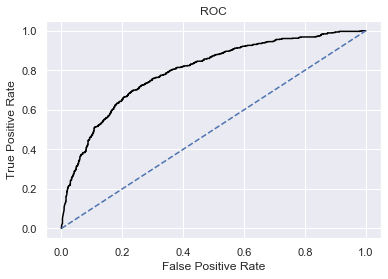

In [126]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', nn_train_auc)

#### NN Model Performance Evaluation on Test data

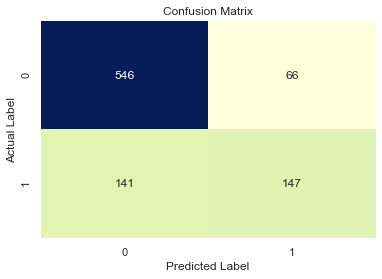

In [127]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [128]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.77

In [129]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       612
           1       0.69      0.51      0.59       288

    accuracy                           0.77       900
   macro avg       0.74      0.70      0.71       900
weighted avg       0.76      0.77      0.76       900



In [130]:
nn_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)      
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.69
nn_test_recall  0.51
nn_test_f1  0.59


Area under Curve is 0.7012867647058822


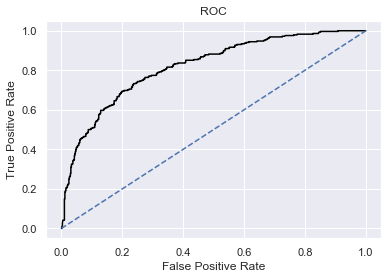

In [131]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict(X_test))
print('Area under Curve is', nn_test_auc)

In [132]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(activation='logistic', hidden_layer_sizes=800, max_iter=500,
              random_state=0)>

#### Neural Network Conclusion

Compare the model performance and give the interpretations
  
<b>Train Data:</b>  
    AUC: 70%        
    Accuracy: 77%        
    Sensitivity: 53%     
    Precision: 64%        
    f1-Score: 58%       
            
<b>Test Data:</b>      
    AUC: 70%      
    Accuracy: 77%      
    Sensitivity: 51%    
    Precision: 69%       
    f1-Score: 59%

#### 2.4 Final Model: Compare all the model and write an inference which model is best/optimized.

#### Comparison of the performance metrics from the 3 models

In [133]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.80,0.79,0.84,0.80,0.77,0.77
AUC,0.84,0.83,0.78,0.73,0.70,0.70
Recall,0.59,0.56,0.64,0.56,0.53,0.51
Precision,0.69,0.73,0.78,0.75,0.64,0.69
F1 Score,0.64,0.63,0.70,0.64,0.58,0.59


#### ROC Curve for the 3 models on the Training data

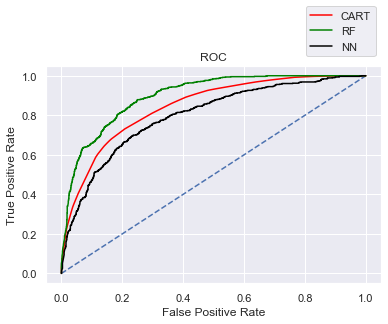

In [134]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

#### ROC Curve for the 3 models on the Test data

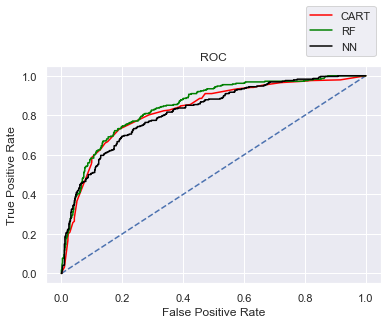

In [135]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

* Out of the 3 models, Random Forest has slightly better performance than the CART & NN model based on accuracy, recall, precision & f1-score.<br>
* Overall, all the 3 models are reasonably stable enough to be used for making any future predictions.<br>
* From CART model variable "Type" is found to be the most useful feature and for RF model variable "Sales" & "Agency_code" are found to be the most useful feature amongst all other features for predicting if a customer will claim or not.

#### 2.5 Inference: Basis on these predictions, what are the business insights and recommendations

* Out of 3 models, Random Forest model seems better solution for this problem.
* Insurance company need to find which Agency has more claim frequency and work with that agency to understand more on the claims and also, they need to check their claim requests thoroughly instead of random audits to identify any fake claims.
* Insurance company need to study the Sales of the insurance policy too to understand more on the claim requests.
* The model needs to be reviewed frequently based on the data available in order to keep the model perform better for all kinds of dataset.